1. Import Libraries

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [84]:
import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\input\breast-cancer-wisconsin.data.txt


In [85]:
import warnings
warnings.filterwarnings('ignore')

2. Import Data

In [86]:
data = './input/breast-cancer-wisconsin.data.txt'
df = pd.read_csv(data, header=None)

3. Exploratory data analysis 

In [87]:
print(df.shape)
print(df.info())

(699, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


我们可以看到，整个数据集有699行和11列。通过数据集的解释，我们可以知道，数据集中有699个样本，10个属性和一个类别。所以，一共是 10 个特征变量和 1 个目标变量。

In [88]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [89]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df
# Id: 样本编号，用于唯一标识每条数据记录，无实际医学含义
# Clump_thickness: 团块厚度，细胞聚集形成的厚度，恶性肿瘤常见较厚团块
# Uniformity_Cell_Size: 细胞大小均匀性，值越高表示大小差异越大，可能为恶性
# Uniformity_Cell_Shape: 细胞形状均匀性，形状多样性可能是恶性表现
# Marginal_Adhesion: 边缘粘附性，肿瘤细胞通常粘附性较弱，值越高越异常
# Single_Epithelial_Cell_Size: 单个上皮细胞大小，异常变大可能提示肿瘤
# Bare_Nuclei: 裸核数量，表示细胞核未被完整包裹，恶性细胞中常见
# Bland_Chromatin: 染色质均匀性，染色质分布不均常见于恶性细胞
# Normal_Nucleoli: 正常核仁数量，恶性细胞中核仁通常更明显和增多
# Mitoses: 有丝分裂次数，细胞分裂活跃程度，值越高越可能是恶性
# Class: 分类标签，目标变量（2 = 良性，4 = 恶性）
# 这些指标基本上是越大越异常

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [90]:
df.drop('Id',axis=1,inplace=True)
#我们应当从数据集中删除那些没有预测能力的冗余列。这里，Id 列就是一个冗余列，因此我们首先将其删除。

In [92]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.info()
#我们可以看到Id列已经被从数据集中删除。
#我们还可以看到，该数据集中包含9个数值型变量和1个分类变量。
#我将通过查看每个变量的频数分布来进一步确认这些信息。

<class 'pandas.core.series.Series'>
RangeIndex: 699 entries, 0 to 698
Series name: Bare_Nuclei
Non-Null Count  Dtype 
--------------  ----- 
699 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB
<class 'NoneType'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  699 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        

In [29]:
for var in df.columns:
    print(df[var].value_counts())
#遍历数据集中的每一列（也就是遍历数据集中的变量），对每一列调用.value_counts()，输出该变量中每个取值出现的次数（而且按照降序排列了）。可以用来了解变量是否为离散型（如分类变量）、是否有某个值占比特别大。

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6

summary of variables
There are 10 numerical variables in the dataset.
All of the variables are of discrete type.
Out of all the 10 variables, the first 9 variables are feature variables and last variables class is the target variable.


3.2 检查缺失值

In [30]:
df.isnull().sum()
#我们发现Bare_Nuclei有缺失值。我们需要进一步深入分析其取值频率分布，帮助理解数据问题的来源。
#我们可以看到该数据集中有 16 个 nan 缺失值。我将会在划分训练集和测试集之后再对这些缺失值进行填补。

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [31]:
print(df.isna().sum())
print(df['Bare_Nuclei'].value_counts())
print(df['Bare_Nuclei'].unique())
print(df['Bare_Nuclei'].isna().sum())

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64
[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]
16


3.3 检查target variable class的分布

In [32]:
# 计算频数和比例
counts = df['Class'].value_counts()
ratios = df['Class'].value_counts(normalize=True) #normalize=True是pandas封装好的计算频率的更简洁的写法。

# 转换为百分比字符串（保留两位小数）
ratios = ratios.map(lambda x: f'{x:.2%}')

# 合并为一个 DataFrame
result = pd.concat([counts, ratios], axis=1)
result.columns = ['Count', 'Proportion (%)']

# 显示结果
print(result)

#我们可以看到Class变量包含2个类标签：2和4。2代表良性肿瘤，4代表恶性肿瘤。他们的分布如proportion所示。

       Count Proportion (%)
Class                      
2        458         65.52%
4        241         34.48%


In [33]:
round(df.describe(),2)

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.00,699.00,699.00,699.00,699.00,683.00,699.00,699.00,699.00,699.00
mean,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,2.82,3.05,2.97,2.86,2.21,3.64,2.44,3.05,1.72,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


4.Data Visualization

4.1 Univariate plots -- check the distribution of variables

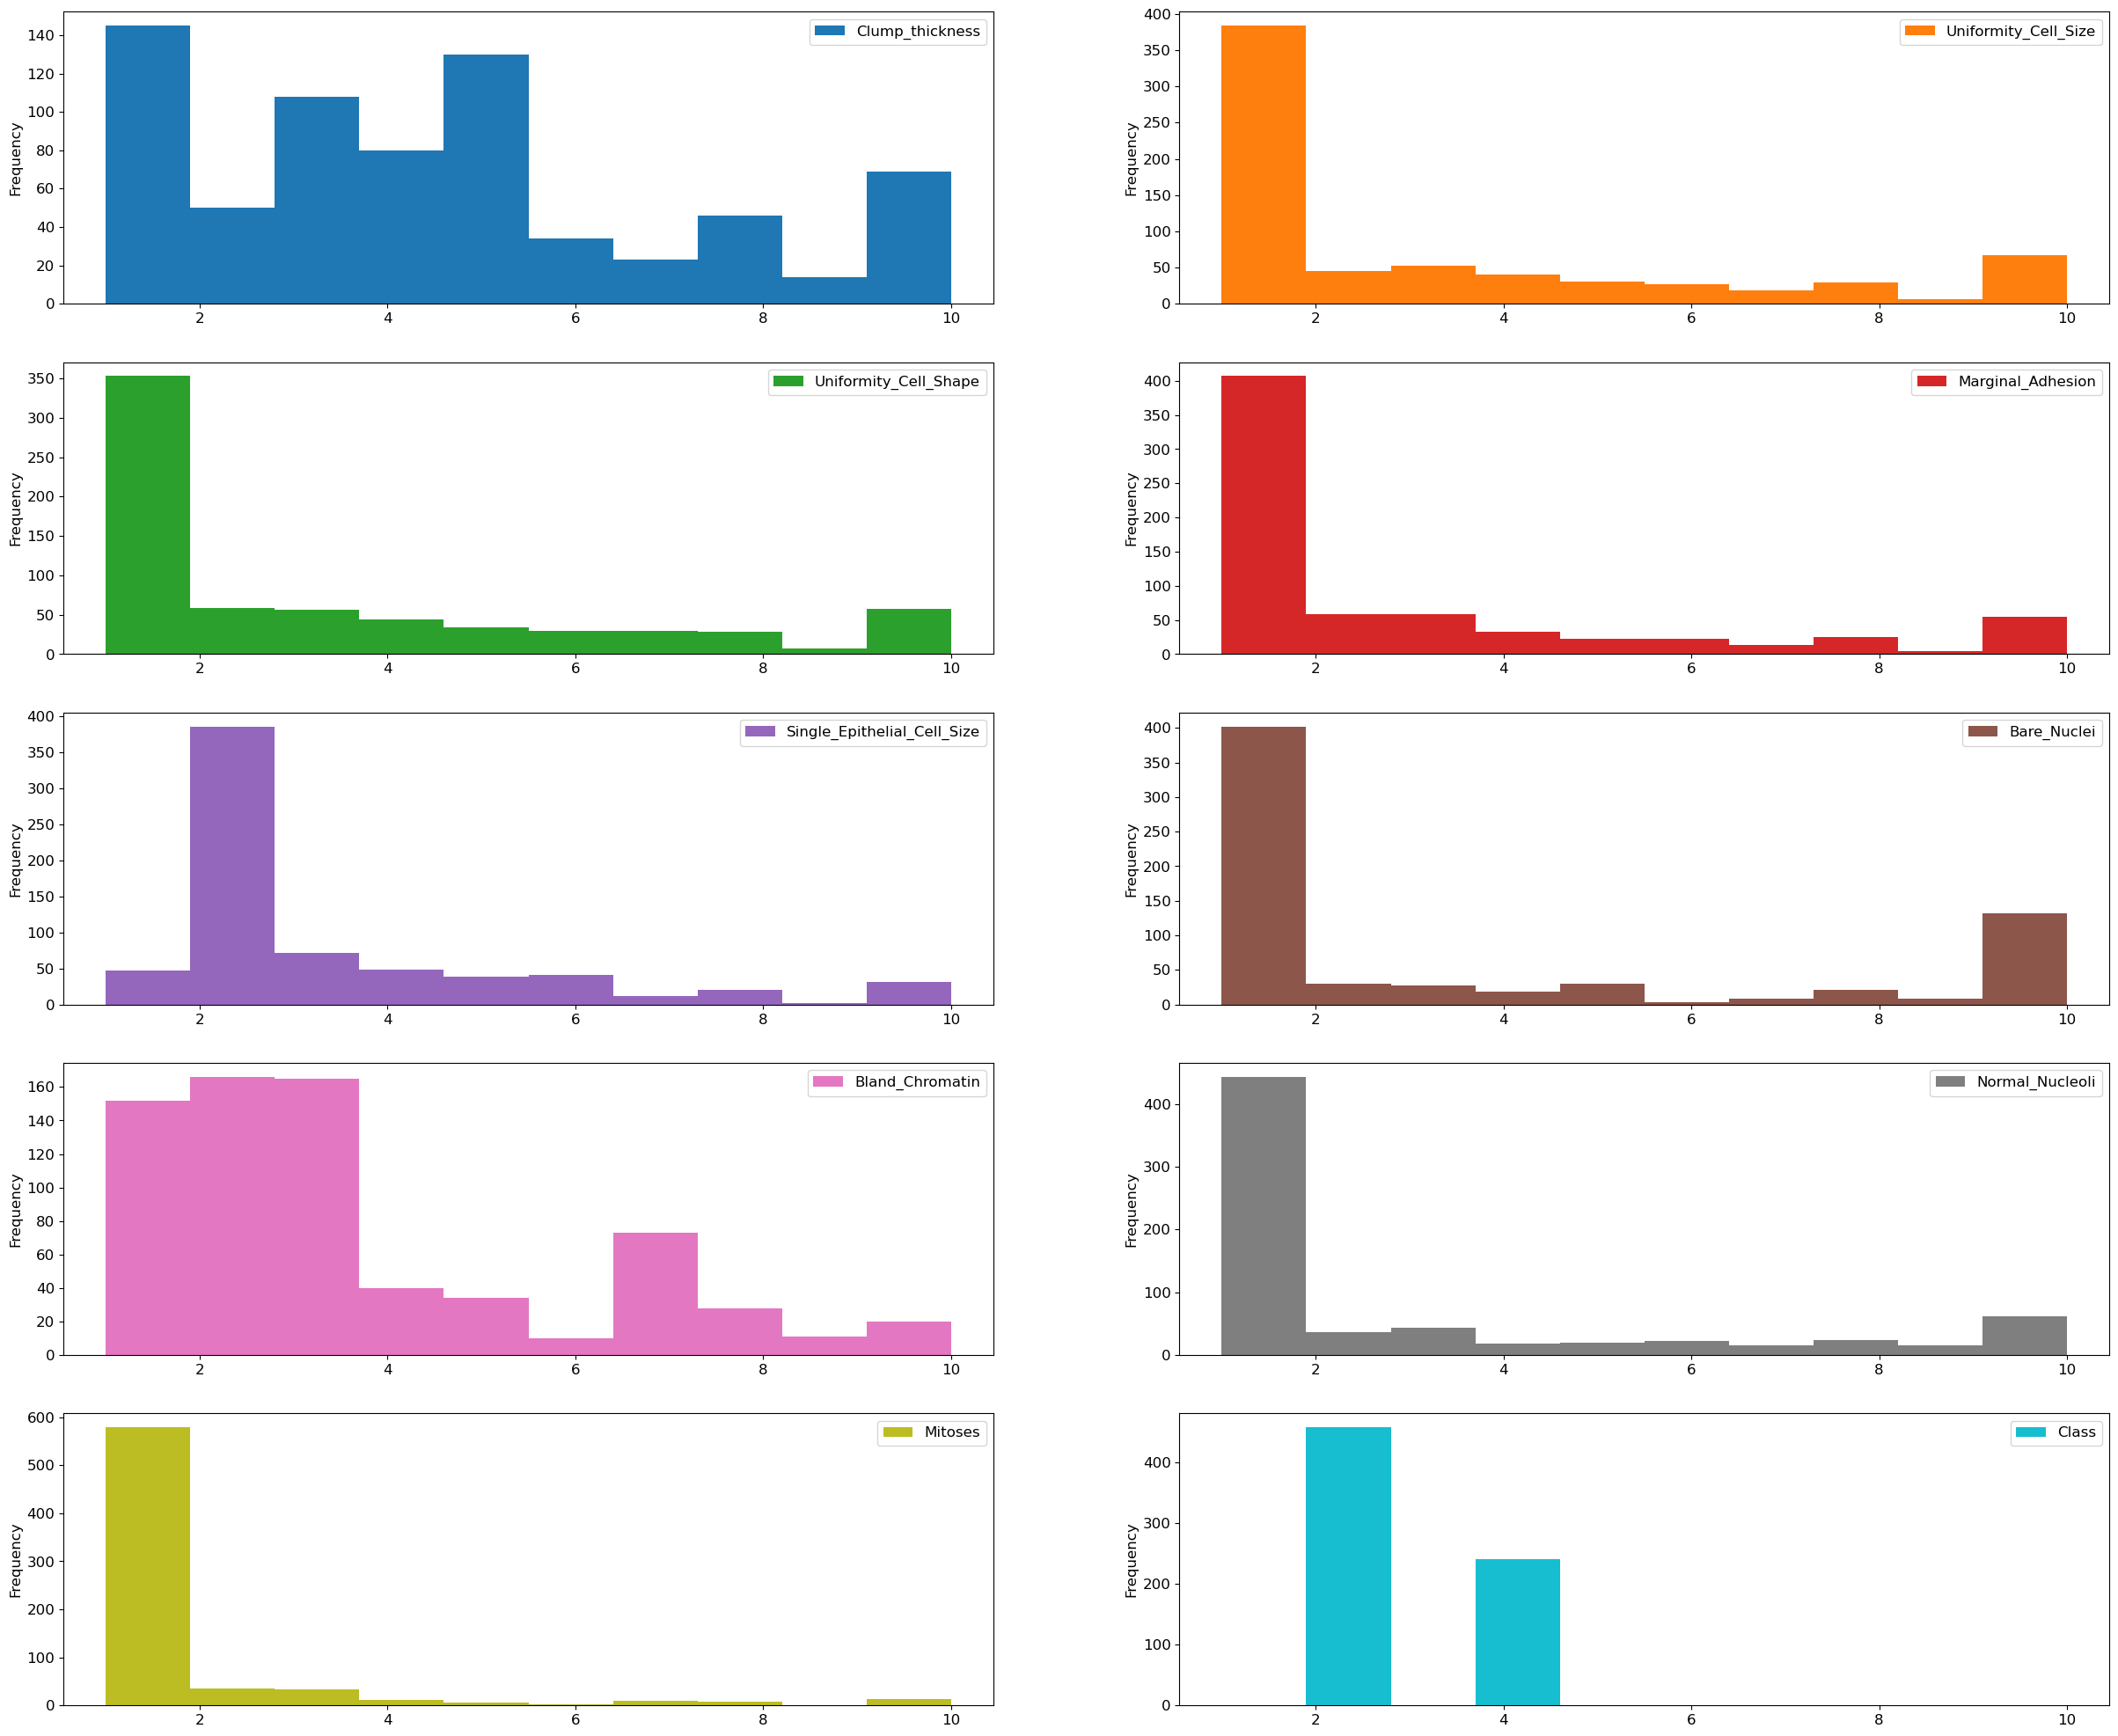

In [96]:
#Now, I will plot the histograms to check variable distributions to find out if they are normal or skewed.
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist',bins=10,subplots=True,layout=(5,2),sharex=False,sharey=False)
plt.show()
#从图中我们可以看出变量在dateset中是positive skewed的（右偏分布）

4.2 Multivariate plots

In [35]:
#估计相关系数
#我们的数据集非常小，所以我们可以用df.corr()计算每两个变量之间的标准相关系数
correlation = df.corr()
correlation

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_Cell_Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_Cell_Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [36]:
correlation['Class'].sort_values(ascending=False)
#由于我们的target variable是Class，所以我们研究feature variable对Class的贡献，将他们与Class的相关系数降序排列
#我们可以发现，Bare_Nuclei是相关性最高的

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

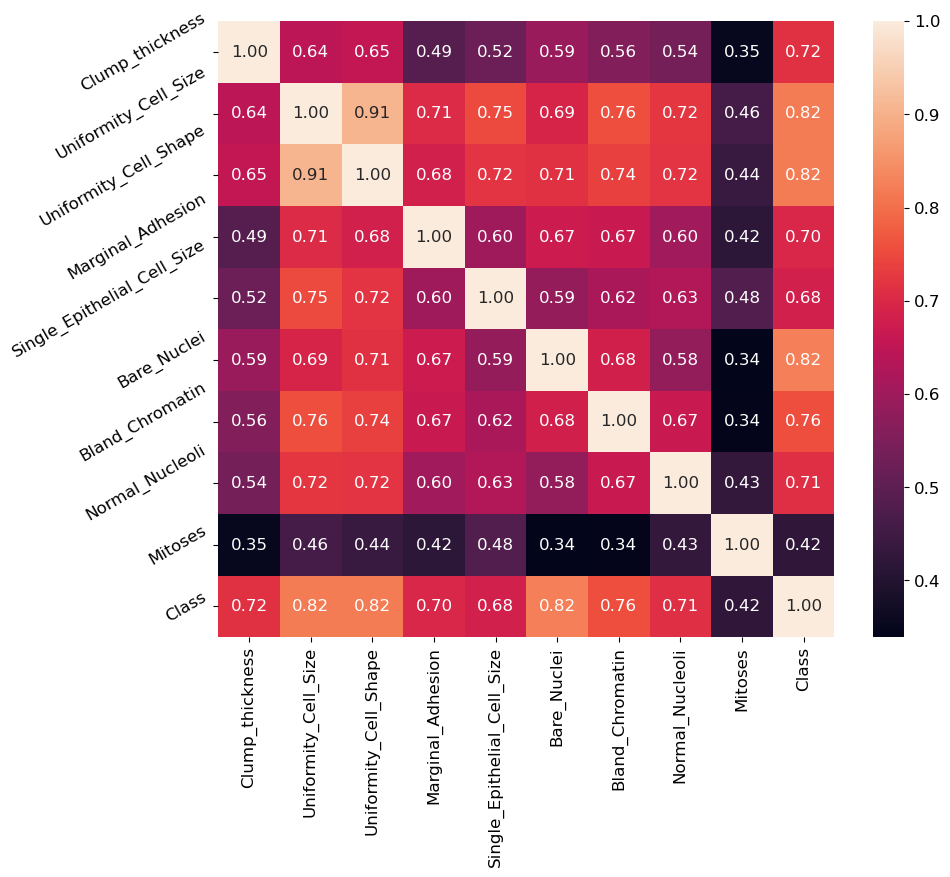

In [97]:
#An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use the seaborn heatmap to explore the patterns and relationships in the dataset.
plt.figure(figsize=(10,8))
#plt.title('Correlation of Attributes with Class variable')
a=sns.heatmap(correlation, square=True,annot=True,fmt='.2f',linecolor='white')#dataframe才能做热力图
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()
#Class与Uniformity_Cell_Size、Uniformity_Cell_Shape 和 Bare_Nuclei 高度正相关。（相关系数约为 0.82）
#Class与肿块厚度，边缘粘附性，单上皮细胞大小和正常核仁数量呈现正相关的结果，相关系数均在0.7左右
#Class与有丝分裂之间呈现弱正相关（相关系数=0.42）
#有丝分裂与其他变量也呈现弱正相关，相关系数均小于0.5

5 Declare feature vector and target variable

In [38]:
x=df.drop(['Class'], axis = 1)
y=df['Class']

6. Split data into separate training and test

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)
x_train.shape, x_test.shape

((559, 9), (140, 9))

7. Feature Engineering

In [40]:
print(x_train.dtypes)
print(x_train.isna().sum())
print(x_test.isna().sum())

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64


In [41]:
for col in x_train.columns:
    if x_train[col].isnull().mean()>0:
        print(col,round(x_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


In [42]:
#假设数据是完全随机缺失的，处理缺失值有两种方法，一种是使用均值(mean)或者中位数（median）来填补；另一种是随机样本填补
#当数据中存在异常值时，应使用中位数填补，因为它对异常值更稳健
#填补缺失值应当仅基于训练集计算统计量（如中位数），然后将其应用于训练集和测试集，这样可以防止过拟合
for df1 in [x_train,x_test]:
    for col in x_train.columns:
        col_median = x_train[col].median()
        df1[col].fillna(col_median,inplace=True)
#现在所有的na值都被填充了，接下来我们要将所有的特征变量映射到相同的scale上，这一步叫做feature scaling

8. Feature Scaling

In [43]:
cols = x_train.columns
cols

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train=pd.DataFrame(x_train, columns=[cols])#因为标准化后x_train输出的数据类型为数组，我们需要重新转化为DataFrame
x_test=pd.DataFrame(x_test,columns=[cols])
x_train.head()
#现在的x_train数据集可以应用于logistic regression classifier了

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


9. Fit K Neighbours classifier to the training eet

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

10. Predict test-set results

In [99]:
y_pred = knn.predict(x_test)

In [100]:
#knn.predict_proba(x_test)会输出一个二维数组，第0列是良性的概率，第1列是恶行的概率。这里的概率是k个最近邻点中，某一类的点出现的概率。
print(knn.predict_proba(x_test)[:,0])
print(knn.predict_proba(x_test)[:,1])

[1.         1.         0.14285714 1.         0.         1.
 0.14285714 1.         0.         0.28571429 1.         1.
 0.         0.14285714 0.         1.         1.         0.
 0.14285714 1.         0.14285714 0.         1.         1.
 0.85714286 0.         1.         1.         0.         0.
 1.         1.         1.         1.         1.         0.57142857
 1.         0.         1.         1.         1.         1.
 1.         1.         0.         0.         1.         0.14285714
 1.         0.         0.         1.         1.         0.
 1.         1.         1.         1.         0.85714286 1.
 0.         1.         1.         0.         0.14285714 0.14285714
 0.         1.         1.         0.14285714 1.         1.
 0.         0.         1.         1.         1.         1.
 0.         1.         1.         1.         0.         1.
 1.         1.         0.         1.         0.         0.
 1.         1.         0.57142857 0.         1.         1.
 1.         0.         1.       

11. Check accuracy score

In [101]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9786


In [104]:
#compare the train-set and test-set accuracy
#现在对比训练集和测试集来检查过度拟合问题
y_pred_train = knn.predict(x_train)
print('Training-set accuracy score: {:.4f}'.format(accuracy_score(y_train,y_pred_train)))
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_test,y_test)))
#结果发现training-set的accuracy score是0.9821，test-set的是0.9714，这两个值是比较接近的，所以这里是没有过度拟合的问题

Training-set accuracy score: 0.9678
Training set score: 0.9678
Test set score: 0.9786


In [103]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [51]:
#我们训练的模型准确率是0.9714，但我们不能仅根据这个数字就认为模型很好。我们需要将其与一个基准对比，这个基准就是空准确率（null accuracy）
#空准确率是指：如果我们总是预测出现频率最多的类别，能获得的准确率
null_accuracy=(85/(85+55))
print('Null accuracy score: {:.4f}'.format(null_accuracy))
#我们模型的准确率是0.9714，空准确率是0.6071，所以可以认为模型的性能是不错的，远高于只会“猜最多类别”的方法

Null accuracy score: 0.6071


12. Rebuild KNN classification model using different values of K

In [52]:
#K=5
def KNC(k,x_train,y_train,x_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    return f'Model accuracy score with k = {k}: {accuracy_score(y_test, y_pred):.4f}'

In [53]:
for i in range(3,10):
    print(KNC(i,x_train,y_train,x_test))
#当k取3-9时，我们发现k=6，7，8时得到的准确率最好，为0.9786。可以得出结论的是我们的分类模型准确率非常高，在预测类别标签方面表现良好，不过准确率并不能揭示预测结果的内部分布情况，也无法反映出模型在分类时到地犯了哪类错误，为了解决这个问题，我们还需要另一个工具叫做confusion matrix（混淆矩阵）。

Model accuracy score with k = 3: 0.9714
Model accuracy score with k = 4: 0.9643
Model accuracy score with k = 5: 0.9714
Model accuracy score with k = 6: 0.9786
Model accuracy score with k = 7: 0.9786
Model accuracy score with k = 8: 0.9786
Model accuracy score with k = 9: 0.9714


13. Confusion matrix

In [54]:
#混淆矩阵是用来总结分类算法性能的工具。它可以清晰地展示分类模型的预测能力和所犯的各种错误类型。
#混淆矩阵能提供以下内容：正确预测与错误预测的总览；各类标签（如良性/恶性）下模型的表现；结果会以表格形式展示，便于分析。
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positive(TP) = ', cm[0,0])
print('\nTrue Negative(TN) = ', cm[1,1])
print('\nFalse Positive(FP) = ', cm[0,1])
print('\nFalse Negative(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positive(TP) =  83

True Negative(TN) =  53

False Positive(FP) =  2

False Negative(FN) =  2


In [55]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train,y_train)
y_pred_7 = knn_7.predict(x_test)
print(f'Model accuracy score with k = 7: {accuracy_score(y_test, y_pred_7):.4f}')

Model accuracy score with k = 7: 0.9786


In [56]:
cm_7 = confusion_matrix(y_test, y_pred_7)
print('Confusion matrix\n\n', cm_7)
print('\nTrue Positive(TP) = ', cm_7[0,0])
print('\nTrue Negative(TN) = ', cm_7[1,1])
print('\nFalse Positive(FP) = ', cm_7[0,1])
print('\nFalse Negative(FN) = ', cm_7[1,0])
#显然，KNN分类模型取k=7的时候的预测是更加精准的，相比于k=3，有更少的错误数量，因此，当k=7时表现更好。


Confusion matrix

 [[83  2]
 [ 1 54]]

True Positive(TP) =  83

True Negative(TN) =  54

False Positive(FP) =  2

False Negative(FN) =  1


<Axes: >

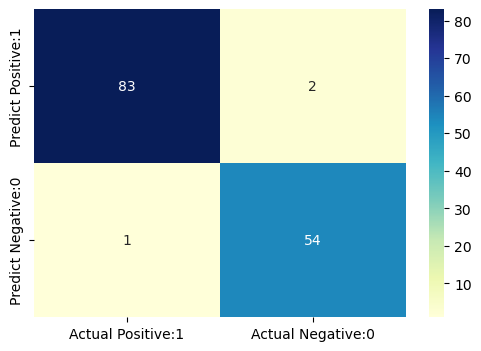

In [57]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


14. Classification metrices

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_7))
#classification_report() 会输出每个类别的：
#precision（精确率）：预测为该类别的样本中有多少是对的。
#recall（召回率）：该类别中有多少被正确预测出来。
#f1-score（F1 分数）：精确率和召回率的调和平均。
#support（支持度）：每个类别在测试集中的真实样本数量。

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [108]:
TP=cm_7[0,0]
TN=cm_7[1,1]
FP=cm_7[0,1]
FN=cm_7[1,0]
#计算整体的精准的
classification_accuracy = (TP+TN)/float(TP+TN+FP+FN)
print('Classification accuracy: {:.4f}'.format(classification_accuracy))
#计算整体的误差
classification_error=(FP+FN)/float(TP+TN+FP+FN)
print('Classification error: {:.4f}'.format(classification_error))
#计算positive的precision
precision = TP/float(TP+FP)
print('Precision:{:.4f}'.format(precision))
#计算class 2的recall
recall = TP/float(TP+FN)
print('Recall:{:.4f}'.format(recall))
#True Positive Rate
true_position_rate = TP/float(TP+FN)
print('True Position Rate:{:.4f}'.format(true_position_rate))
#False Positive Rate
false_position_rate = FP/float(FP+TN)
print('False Position Rate:{:.4f}'.format(false_position_rate))
#Specificity
specificity = TN/float(FP+TN)
print('Specificity:{:.4f}'.format(specificity))
#f1分数和support省略

Classification accuracy: 0.9786
Classification error: 0.0214
Precision:0.9765
Recall:0.9881
True Position Rate:0.9881
False Position Rate:0.0357
Specificity:0.9643


14.1 调整classific threshold level

In [62]:
y_pred_prob = knn.predict_proba(x_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of benign cacer (2)', 'Prob of malignant cancer (4)'])
y_pred_prob_df
#我们可以根据预测为良性或恶性癌症的概率，对观测样本进行排序。默认的分类阈值为0.5，如果恶性癌症（类别 4）的预测概率 > 0.5，则预测为恶性；如果良性癌症（类别 2）的预测概率 < 0.5，则预测为良性。

,Prob of benign cacer (2),Prob of malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


Text(0, 0.5, 'Frequency')

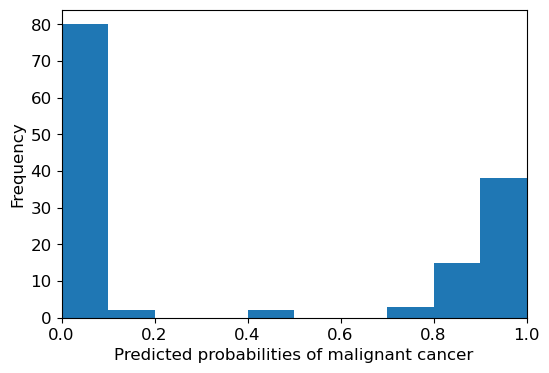

In [109]:
y_pred_1 = knn.predict_proba(x_test)[:,1]
plt.figure(figsize=(6,4))
plt.rcParams['font.size']=12
plt.hist(y_pred_1,bins=10)
#plt.title('Histogram of predicted probabilities of malignant cancer')
plt.xlim(0,1)
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')
#我们可以看到这个直方图是右偏的，80多个观测样本恶性的概率为0，较少的观测样本概率大于0.5，所以较少的观测样本预测为恶性肿瘤。


15. ROC-AUC

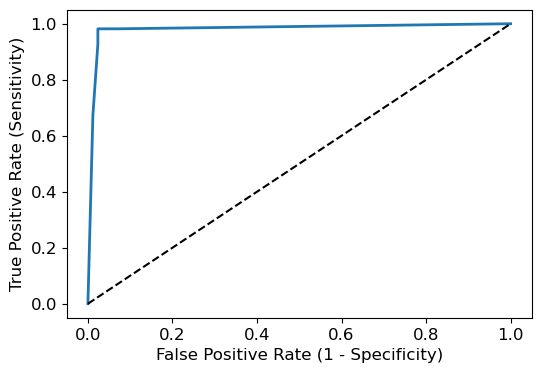

In [110]:
#ROC曲线（接收者操作特征曲线）是另一种评估分类模型性能的可视化工具。展示了分类模型在不同分类阈值（threshold）下的性能。
#横轴为FPR（假阳性率）=FP/FP+TN，纵轴为TPR（真阳性率）=TP/TP+FN
#ROC 曲线中，我们观察的是在多个阈值下 TPR 与 FPR 的变化
#如果我们降低分类阈值，意味着更容易被分类为“正类”，这会让TP增加，FP也增加，所以ROC曲线的本质是权衡Recall与False Positive Rate
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_1,pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)#linewidth=2是设置线宽为2的，使得曲线更加清晰
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size']=12
#plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


In [71]:
#ROC AUC 全称是：Receiver Operating Characteristic - Area Under Curve（接收者操作特征曲线下的面积）
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_1)
print('ROC AUC: {:.4f}'.format(ROC_AUC))  
#ROC AUC是一个对整体分类表现的一个评判数据，数据越大，说明分类方法的表现越好。由于我们的ROC AUC数值接近1了，因此我们的分类方法在预测良性和恶性肿瘤方面表现良好。


ROC AUC: 0.9825


In [73]:
#k折交叉验证就是将数据分为k组，其中的k-1组作为训练集，1组作为测试集，循环下去，然后可以得到k个得分。在这里我们对k个得分进行了一个求均值的操作。
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(knn_7,x_train, y_train,cv=5,scoring='roc_auc').mean()
print('Cross validated ROC AUC: {:.4f}'.format(Cross_validated_ROC_AUC))
#我们交叉验证ROC AUC得分非常接近1。因此，我们可以得出结论：这个KNN分类器的确是一个表现非常优秀的模型。

Cross validated ROC AUC: 0.9910


In [80]:
#以accuracy作为评判标准去进行交叉验证,其中accuracy是他内部自己的一个函数，计算预测准确率的
#我们这里使用的是 10 折交叉验证。即把训练数据集分成 10 份，每次取 9 份训练，1 份验证，重复 10 次，每次验证集不同，最终返回 10 个验证得分。
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_7, x_train, y_train, cv=10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))
#通过平均交叉验证得分，我们可以得出模型平均准确率约为 96.46%。
#如果我们观察这 10 次交叉验证产生的所有得分，会发现准确率在 87.72% 到 100% 之间浮动，说明模型在不同训练折的表现差异较大。
#模型性能 依赖于划分的训练数据（folds），原因之一可能是数据集本身比较小
#因此，在这个模型中，10 折交叉验证的结果 没有带来额外的性能提升，但可以提升模型评估的稳定性和可靠性。

Cross-validation scores:[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]
Average cross-validation score: 0.9643


16. Conclusion

1、在本项目中，我构建了一个用于对乳腺癌患者进行分类的 kNN 分类器模型。该模型表现非常出色，其模型准确率在 k=7 时达到了 0.9786。

2、当 k=3 时，训练集准确率为 0.9821，测试集准确率为 0.9714。两者数值非常接近，因此可以排除过拟合的问题。

3、我将模型准确率（0.9714）与空准确率（0.6071）进行了比较。因此可以得出结论，我们的 K 近邻模型在预测类别标签方面表现良好。

4、我们原始模型在 k=3 时的准确率是 0.9714。我们看到，当 k=5 时准确率仍为 0.9714，但继续增加 k 值可以提升准确率：k=6、7、8 时准确率提升到 0.9786，说明模型性能有所改善。但当 k=9 时准确率又下降回 0.9714。因此可以认为最优的 k 值是 7。

5、k=7 的 kNN 分类模型比 k=3 模型在预测上更准确，错误率更低，因此在 k=7 时性能得到了提升。

6、模型的 ROC AUC 值接近 1，因此可以说明模型在预测良性或恶性癌症方面表现良好。

7、利用平均交叉验证结果可知，该模型在平均水平上可达到约 96.46% 的准确率。

8、查看 10 次 10 折交叉验证的得分后可以发现，各折之间准确率存在较大的波动，从 100% 到 87.72%。因此可得出结论：模型对训练所用的折划分较为敏感，而这可能也与数据集规模较小有关。
